In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Input,Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet
from keras.applications.densenet import DenseNet121
from keras.preprocessing import sequence
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import itertools 
from keras.models import Model    
from keras.layers import *
from keras.layers import LSTM, Dense
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 

import time
import numpy as np
from keras.layers import Embedding
from keras.constraints import *
from keras.optimizers import *
from keras.utils import np_utils
from keras import Model
from keras.layers import *
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [ ]:
img=image.load_img("/content/drive/MyDrive/dataset/data/train/normal/normal_series_-img-00003-00020.jpg")

# New section

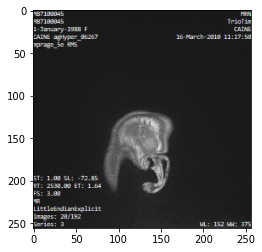

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/dataset/data/train/normal/normal_series_-img-00003-00020.jpg")

array([[[ 36,  22,  23],
        [ 33,  23,  23],
        [ 28,  23,  24],
        ...,
        [ 32,  24,  24],
        [ 28,  23,  24],
        [ 23,  23,  23]],

       [[ 41,  29,  27],
        [ 32,  25,  22],
        [ 29,  25,  20],
        ...,
        [ 31,  25,  20],
        [ 27,  26,  22],
        [ 23,  27,  22]],

       [[177, 174, 166],
        [167, 165, 154],
        [ 74,  72,  54],
        ...,
        [202, 203, 187],
        [ 22,  29,  16],
        [160, 168, 157]],

       ...,

       [[113, 105,  98],
        [192, 188, 183],
        [188, 191, 189],
        ...,
        [196, 190, 183],
        [183, 189, 188],
        [104, 117, 119]],

       [[ 28,  24,  23],
        [ 28,  26,  25],
        [ 26,  26,  26],
        ...,
        [ 37,  35,  34],
        [ 33,  35,  36],
        [ 28,  32,  33]],

       [[ 24,  24,  24],
        [ 27,  27,  27],
        [ 25,  25,  25],
        ...,
        [ 35,  35,  35],
        [ 33,  32,  34],
        [ 35,  34,  36]]

In [ ]:
cv2.imread("/content/drive/MyDrive/dataset/data/train/normal/normal_series_-img-00003-00020.jpg").shape

(256, 256, 3)

In [ ]:
Train="/content/drive/MyDrive/dataset/data/train"
Test="/content/drive/MyDrive/dataset/data/test"
Valid="/content/drive/MyDrive/dataset/data/validation"

In [ ]:
train= ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset= train.flow_from_directory(Train, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

valid_dataset=valid.flow_from_directory(Valid, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

test_dataset=test.flow_from_directory(Test, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

Found 282 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [ ]:
history_densenet=model.fit(train_dataset, epochs=5, steps_per_epoch=15, validation_data=(valid_dataset),validation_steps=5)

Epoch 1/5
15/15 [==============================] - 79s 5s/step - loss: 0.0627 - accuracy: 0.9744 - val_loss: 0.3043 - val_accuracy: 0.8250
Epoch 2/5
15/15 [==============================] - 6s 405ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.9234 - val_accuracy: 0.7750
Epoch 3/5
15/15 [==============================] - 3s 186ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.3681 - val_accuracy: 0.7875
Epoch 4/5
15/15 [==============================] - 1s 93ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1807 - val_accuracy: 0.8000
Epoch 5/5
15/15 [==============================] - 1s 89ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.2908 - val_accuracy: 0.8000


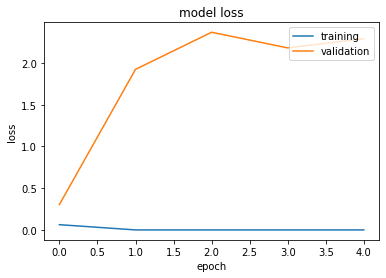

In [ ]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
valid_score = model.evaluate_generator(valid_dataset, steps=6, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])
print("[INFO] Precision: ",valid_score[1])
print("[INFO] Recall: ",valid_score[1])

1/6 [====>.........................] - ETA: 0s - loss: 8.6169 - accuracy: 0.4375

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


6/6 [==============================] - 1s 90ms/step - loss: 3.4086 - accuracy: 0.7579
[INFO] accuracy: 75.79%
[INFO] Loss:  3.408639430999756
[INFO] Precision:  0.75789475440979
[INFO] Recall:  0.75789475440979


In [ ]:
train_score = model.evaluate_generator(train_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 

print("[INFO] Loss: ",train_score[0])
print("[INFO] Precision: ",train_score[1])
print("[INFO] Recall: ",train_score[1])

1/2 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[INFO] accuracy: 100.00%
[INFO] Loss:  0.0
[INFO] Precision:  1.0
[INFO] Recall:  1.0


In [ ]:
test_score = model.evaluate_generator(test_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])
print("[INFO] Precision: ",test_score[1])
print("[INFO] Recall: ",test_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 5s 5s/step - loss: 1.1614 - accuracy: 0.9062
[INFO] accuracy: 90.62%
[INFO] Loss:  1.1614001989364624
[INFO] Precision:  0.90625
[INFO] Recall:  0.90625


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
test_generator = test_datagen.flow_from_directory(
        Test,
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary',
        shuffle=False) 

Found 87 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_generator, steps=10, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

10/10 [==============================] - 10s 1s/step


In [ ]:
import pandas as pd
import seaborn as sn
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
   
    cm=confusion_matrix(y_true, y_pred)
   
    plt.figure(figsize = (7,5))
    sn.heatmap( cm, annot=True,cmap="OrRd")
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    print(cm)
    return accuracy, precision,  recall, f1Score

Accuracy  : 0.8045977011494253
Precision : 0.8436781609195403
Recall : 0.8045977011494253
f1Score : 0.7363619777412881
[[ 2 17]
 [ 0 68]]


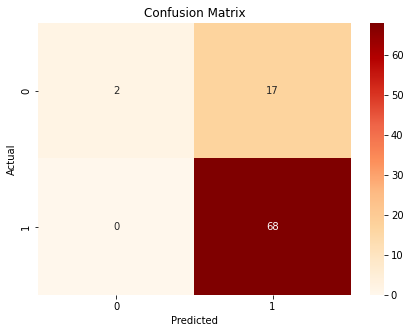

In [ ]:
testAcc,testPrec,testrecall, testFScore = my_metrics(true_classes, yPredictions)

In [ ]:
test_path='/content/drive/MyDrive/dataset/data/test'

In [ ]:
x_Train="/content/drive/MyDrive/dataset/data/train"
y_Train="/content/drive/MyDrive/dataset/data/test"
valid="/content/drive/MyDrive/dataset/data/validation"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40, random_state = 42)


In [ ]:
model .fit(Train,Test)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.kernel_approximation import RBFSampler

from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import ComplementNB,BernoulliNB
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt

NameError: ignored

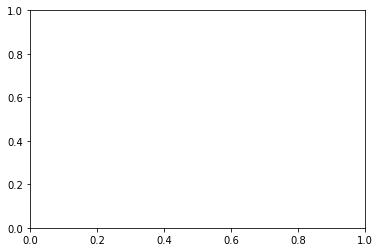

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
 
model = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output
 
#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)
  
conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):
 
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
 
   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)
 
   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   #print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, model.predict(X_test))
   accuracy_scores.append(acc_score)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)
 
#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)
 
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
 
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
 
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/MyDrive/dataset/data/train/normal/normal_series_-img-00003-00020.jpg')
 
#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))
 
#print(conf_mat)